# Hypothesis Testing in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import pandas
import pandas as pd

# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
late_shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

## Z-Score

In [2]:
import numpy as np

#calculating sample mean
late_prop_samp = (late_shipments['late']=='Yes').mean()

#supposing hypothesis mean as 6%
late_prop_hyp = 0.06

#std. error from bootstrap distribution
bootstrap_dist = []
for i in range(5000):
    bootstrap = late_shipments.sample(frac=1,replace=True)
    bootstrap_dist.append((bootstrap['late']=='Yes').mean())
    
std_error = np.std(bootstrap_dist,ddof=1)

#calculating z-score
z_score = (late_prop_samp-late_prop_hyp)/std_error
print(z_score)

0.13159285201916476


### One-tail Test and Two-tail Test
![image](image.png)


## p-value 
probability of obtaining a result, assuming null hypothesis is true

- Large p-value, large support for Ho : statistic likely not in the tail of null ditribution
- Small p-value, strong evidence against Ho : statistic likely in the tail of null distribution

### Calculating p-values
![image-2](image-2.png)


In [3]:
"""The null hypothesis, 
is that the proportion of late shipments is six percent.

The alternative hypothesis, 
is that the proportion of late shipments is greater than six percent."""

from scipy.stats import norm
#right-tail test
p_value = 1-norm.cdf(z_score,loc=0,scale=1)
print(p_value)

0.44765316980959025


## Significance Level
The _significance level_ of a hypothesis test(α) is the threshold point for 'beyond a resonable doubt'.

In [4]:
alpha = 0.05 #95% confidence interval
p_value <= alpha #reject null hypothesis if true

False

# Two-Sample and ANOVA Tests

### Performing t-tests

Are users who first programmed as a child compensated higher than those that started as adults?

- 'converted_comp'
- 'age_first_code_cut'

Hypotheses

- Ho: The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult.

- Ha: The mean compensation (in USD) is greater for those that coded first as a child compared to those that coded first as an adult.

t-test: 
![image-3](image-3.png)

![image-4](image-4.png)


In [5]:
#stats of sample data
xbar = stackoverflow.groupby('age_first_code_cut')['converted_comp'].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [6]:
#std of sample data 
s = stackoverflow.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [7]:
#sample size
n = stackoverflow.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [8]:
#calculating test statistic supposing null hypothesis as true, difference in population parameters is 0
import numpy as np
numerator = xbar['child'] - xbar['adult']
denominator = np.sqrt(s['child']**2 / n['child'] + s['adult']**2 / n['adult'])
t_stat = numerator / denominator
t_stat

1.8699313316221844

### Calculating p-values from t-statistics

In [9]:
#significance level
alpha = 0.1 #90% confidence interval

In [10]:
#df = no.of observations - 2 
degrees_of_freedom = n['child']+n['adult'] - 2
degrees_of_freedom

2259

In [11]:
"""The mean compensation (in USD) is greater for those that coded first as a child compared to those that coded first as an adult. 
So, performing right-tail test"""

from scipy.stats import t
p_value = 1 - t.cdf(t_stat, df = degrees_of_freedom)
p_value

0.030811302165157595

In [12]:
p_value <= alpha #reject null hypothesis if true

True

### t-test for late_shipments dataset
Recall the hypotheses:

Ho: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

Ha: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

In [13]:
late_shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,ASPEN PHARMACARE,"Etravirine 100mg [Intelence], tablets, 120 Tabs",Etravirine,Intelence,100mg,Tablet,120.0,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30.0,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


In [14]:
#mean of sample
x_bar = late_shipments.groupby('late')['weight_kilograms'].mean()
x_bar

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

In [15]:
#std of sample
x_std = late_shipments.groupby('late')['weight_kilograms'].std()
x_std

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [16]:
#no. of observations of sample
n = late_shipments.groupby('late')['weight_kilograms'].count()
n

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

In [17]:
# calulating t supposing null hypothesis as true, so diff. of pop. parameter is 0
import numpy as np
numerator = x_bar['No'] - x_bar['Yes'] 
denominator = np.sqrt(x_std['No']**2/n['No'] + x_std['Yes']**2/n['Yes'])
t_stats = numerator / denominator
t_stats

-2.3936661778766433

In [18]:
#calculating p_value 
alpha = 0.05 #95% confidence interval
degrees_of_freedom = n['Yes'] + n['No'] -2

from scipy.stats import t
#left tail test
p_value = t.cdf(t_stats,df=degrees_of_freedom)
p_value

0.008432382146249523

In [19]:
#conclusion
p_value <= alpha #if true, reject null hypothesis

True

### Paired t-tests

In [20]:
republican_votes

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757
...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478
96,Wisconsin,La Crosse,37.490904,40.577038
97,Wisconsin,Lafayette,38.104967,41.675050
98,Wyoming,Weston,76.684241,83.983328


**Hypotheses**

Question: Was the percentage of Republican candidate votes lower in 2008 than 2012?

- Ho: μ2008 - μ2012 = 0
- Ha: μ2008 - μ2012 < 0

In [21]:
#set significance level
aplha = 0.05

In [22]:
#from two samples to one
sample_data = republican_votes
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

<AxesSubplot: >

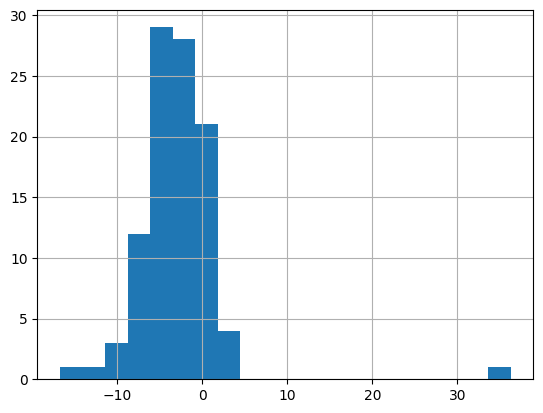

In [23]:
#visaualization
import matplotlib.pyplot as plt
sample_data['diff'].hist(bins=20)

In [24]:
#calculate sample statistics of the difference
xbar_diff = sample_data['diff'].mean()
xbar_diff

-2.877109041242944

**Revised Hypotheses**

- Ho: μdiff = 0
- Ha: μdiff < 0

**test-statistics**
![image-5](image-5.png)

**degree of freedom**
![image-6](image-6.png)


In [25]:
#calculating t_stat assuming null hypothesis as true
n_diff = len(sample_data)
s_diff = sample_data['diff'].std()

t_stat = xbar_diff / np.sqrt(s_diff**2/n_diff)
t_stat

-5.601043121928489

In [26]:
#calculating p_value
degrees_of_freedom = n_diff - 1

from scipy.stats import t
#left tail test
p_value = t.cdf(t_stat, df = degrees_of_freedom)
p_value

9.572537285272411e-08

In [27]:
#conclusion 
p_value <= alpha #if true reject null hypotheses

True

### Testing differences between two means using ttest()

In [28]:
import pingouin
pingouin.ttest(x=sample_data['diff'],
              y=0,
              alternative = 'less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


### ttest() with paired=True

In [29]:
pingouin.ttest(x=sample_data['repub_percent_08'],
              y=sample_data['repub_percent_12'],
              paired = True,
              alternative = 'less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


### ttest of democrat_votes dataset

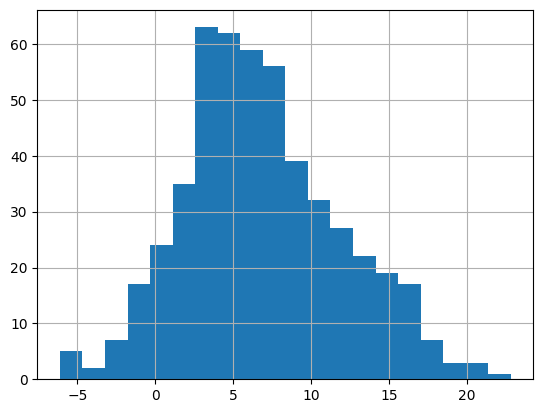

In [30]:
#sample_dem_data
sample_dem_data = democrat_votes

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

plt.clf()
# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

- Ho: The proportion of democratic votes in 2012 and 2016 were the same. 
- Ha: The proportion of democratic votes in 2012 and 2016 were different.

In [31]:
import pingouin
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],
                              y=0,
                              alternative = 'two-sided')

                            
# Print the test results
test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


In [32]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], y= sample_dem_data['dem_percent_16'], alternative = 'two-sided',paired = True)

                         
# Print the paired test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


### ANOVA Test (Analysis of variance)

The late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

**Hypotheses**

Ho: Pack prices for every category of shipment mode are the same.

Ha: Pack prices for some categories of shipment mode are different.

In [33]:
#setting significance level
alpha = 0.1 #confidence interval 90%

# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv = 'pack_price', between = 'shipment_mode')

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [34]:
#conclusion
anova_results['p-unc'] <= alpha #if true, reject null hypotheses

0    True
Name: p-unc, dtype: bool

### Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

In [35]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments,dv='pack_price',between='shipment_mode',padjust=None) 

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


In [36]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


# Proportion Test

## One-sample Proportion Test

![image-7](image-7.png)


![image-8](image-8.png)


**Hypotheses**

- Ho: Proportion of Stack Overflow users under thirth = 0.5
- Ha: Proportion of Stack Overflow users under thirty != 0.5

In [37]:
alpha =0.1

stackoverflow['age_cat'].value_counts(normalize=True)

Under 30       0.535604
At least 30    0.464396
Name: age_cat, dtype: float64

In [38]:
#proportion of sample rows where age cat equals under thirty
p_hat = (stackoverflow['age_cat']=='Under 30').mean()
p_hat

0.5356037151702786

In [39]:
#hypothesized proportion
p_0 = 0.50

In [40]:
#number of observations
n = len(stackoverflow)
n

2261

In [41]:
# Calculating the z-score
import numpy as np
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)
z_score = numerator / denominator
z_score

3.385911440783663

In [42]:
#Calculating p_value
from scipy.stats import norm
#two-tailed('not equal')
p_value = norm.cdf(-z_score) + 1- norm.cdf(z_score) 
p_value

0.0007094227368100725

In [43]:
#conclusion
p_value <= alpha #if true reject null hypothesis

True

## Two-sample Proportion Test

![image-9](image-9.png)


**Hypotheses**

- Ho : Proportion of hobbyist users is the same for those under thirty as those at least thirty
- Ha : Proportion of hobbyist users is different for those under thirty as those at least thirty

In [44]:
alpha = 0.05 #confidence interval 95%

In [45]:
p_hats = stackoverflow.groupby('age_cat')['hobbyist'].value_counts(normalize = True)
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [46]:
p_hat_at_least_30 = p_hats[('At least 30','Yes')]
p_hat_under_30 = p_hats[('Under 30','Yes')]
print(p_hat_at_least_30,p_hat_under_30)

0.7733333333333333 0.8431048720066061


In [47]:
n = stackoverflow['age_cat'].value_counts()
n

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64

In [48]:
n_at_least_30 = n['At least 30']
n_under_30 = n['Under 30']
print(n_at_least_30, n_under_30)

1050 1211


In [49]:
p_hat = (n_at_least_30*p_hat_at_least_30 + n_under_30*p_hat_under_30) / (n_at_least_30 + n_under_30)

std_error = np.sqrt(p_hat*(1-p_hat) / n_at_least_30 +
                   p_hat*(1-p_hat) / n_under_30)

In [50]:
z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error
z_score

-4.223691463320559

### Calculating z_score using proportions_ztest()

In [51]:
stackoverflow.groupby('age_cat')['hobbyist'].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [52]:
n_hobbyists = np.array([812,1021])
n_rows = np.array([812+238,1021+190])

from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyists, nobs=n_rows, alternative = 'two-sided')
z_score, p_value

(-4.223691463320559, 2.403330142685068e-05)

## Chi-squared test of independence

In [53]:
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stackoverflow, x='hobbyist',y='age_cat',correction=False)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.839570,1.0,0.000024,0.088826,0.988205
1,cressie-read,0.666667,17.818114,1.0,0.000024,0.088773,0.988126
2,log-likelihood,0.000000,17.802653,1.0,0.000025,0.088734,0.988069
3,freeman-tukey,-0.500000,17.815060,1.0,0.000024,0.088765,0.988115
4,mod-log-likelihood,-1.000000,17.848099,1.0,0.000024,0.088848,0.988236
5,neyman,-2.000000,17.976656,1.0,0.000022,0.089167,0.988694


**Hypotheses**

- Ho: Age categories are independent of job satisfaction levels
- Ha: Age categories are not independent of job satisfaction levels

In [54]:
# 'age_cat' is reponse variable
# 'job_sat' is explanatory variable

alpha = 0.1

expected, observed, stats = pingouin.chi2_independence(data=stackoverflow, x='job_sat',y='age_cat',correction=False)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


p_value is 0.23 > aplha so, it fails to reject null hypotheses. Hence, Age category is independent of job satisfaction level.

## Performing Chi-2 test

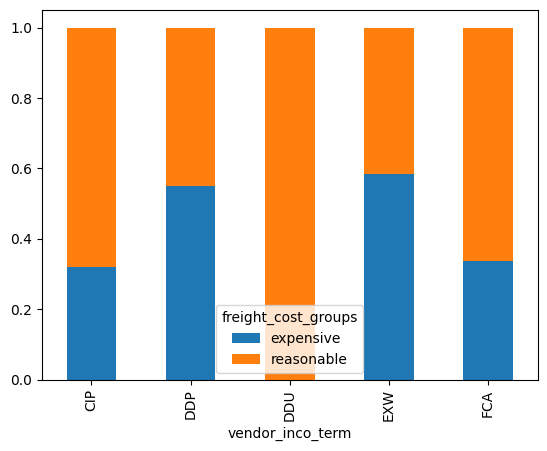

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


In [55]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='vendor_inco_term',y='freight_cost_groups',correction=False)

# Print results
print(stats[stats['test'] == 'pearson']) 

## Chi-square goodness of fit tests
(compare single categorical variable with hypothesised dist.)

In [56]:
#how do you feel when you discover that you've already visited the top resources? 

purple_link_counts = stackoverflow['purple_link'].value_counts()

purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')

purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [57]:
#Declaring the hypotheses
hypothesized = pd.DataFrame({
    'purple_link':['Amused','Annoyed','Hello, old friend','Indifferent'],
    'prop':[1/6,1/6,1/2,1/6]
})
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


**Hypotheses**
- Ho: The sample matches the hypothesized distribution
- Ha: The sample does not match the hypothesized distribution

In [58]:
aplha =0.01

n_total = len(stackoverflow)
hypothesized['n'] = hypothesized['prop']*n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


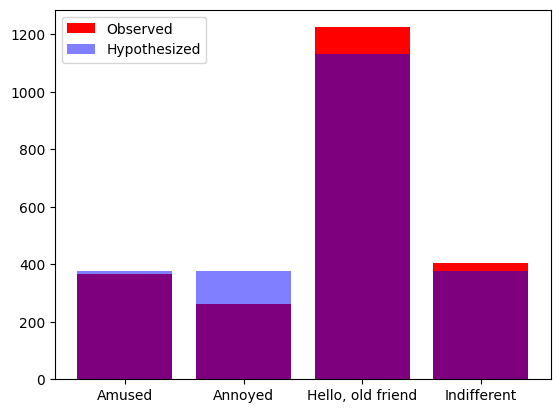

In [59]:
#visaulizing counts
import matplotlib.pyplot as plt

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'],color='r',label='Observed')

plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='b',label='Hypothesized')

plt.legend()
plt.show()

In [60]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

# Non-Parametric Tests
- Non-Parametric Tests are more reliable than parametric tests for **small sample sizes** and when data **isn't normally distributed.**

## Wilcoxon-signed rank test

In [61]:
import pingouin

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=democrat_votes['dem_percent_12'],y=democrat_votes['dem_percent_16'],paired=True,alternative= 'greater') 

# Print paired t-test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,greater,1.800317e-115,"[6.46, inf]",0.454202,4.491e+111,1.0


In [62]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=democrat_votes['dem_percent_12'],y=democrat_votes['dem_percent_16'],alternative='greater')

# Print Wilcoxon test results
wilcoxon_test_results

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,122849.0,greater,8.901980e-78,0.961661,0.644816


## Non-parametric ANOVA and unpaired t-tests

### Wilcoxon-Mann-Whitney

In [63]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms','late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
y=weight_vs_late_wide['Yes'],
alternative='two-sided')

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


### Kruskal-Wallis

In [64]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,
dv='weight_kilograms',
between = 'shipment_mode')

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
